In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

we will concatenate the two files : (train.csv and test.csv)

In [2]:
import pandas as pd
train_df = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')
concat_df = pd.concat([train_df, test_df])
concat_df.to_csv('concat.csv', index=False)

In [3]:
print(concat_df.head())

   id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T  

In [4]:
print(concat_df.shape)

(314223, 13)


In [6]:
print(concat_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 314223 entries, 0 to 125689
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            314223 non-null  int64  
 1   brand         314223 non-null  object 
 2   model         314223 non-null  object 
 3   model_year    314223 non-null  int64  
 4   milage        314223 non-null  int64  
 5   fuel_type     305757 non-null  object 
 6   engine        314223 non-null  object 
 7   transmission  314223 non-null  object 
 8   ext_col       314223 non-null  object 
 9   int_col       314223 non-null  object 
 10  accident      310139 non-null  object 
 11  clean_title   278565 non-null  object 
 12  price         188533 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 33.6+ MB
None


detect and count missing values ​​(NaN, Not a Number) in a dataframe.

In [7]:
print(concat_df.isna().sum())

id                   0
brand                0
model                0
model_year           0
milage               0
fuel_type         8466
engine               0
transmission         0
ext_col              0
int_col              0
accident          4084
clean_title      35658
price           125690
dtype: int64


we will convert the columns which have an object value to a float value, we will use the pandas astype() method.

In [8]:
import re
import numpy as np
def build_new_data(data):
    data = data.copy()
    #Extract only digits before "HP", handle cases where no match is found
    def extract_engine_strength(engine):
        if pd.isnull(engine):
            return None
        match = re.search(r'\d+\.?\d*(?=HP)', engine)
        return float(match.group()) if match else None
    #Extract the front engine capacity “L"
    def extract_engine_capacity(engine):
        if pd.isnull(engine):
            return None
        match = re.search(r'\d+\.?\d*(?=L)', engine)
        return float(match.group()) if match else None
    
    #Add engine_strength column
    data['engine_strength'] = data['engine'].apply(extract_engine_strength)
    #Add engine_capacity column
    data['engine_capacity'] = data['engine'].apply(extract_engine_capacity)
    return data
concat_df = build_new_data(concat_df)
print(concat_df.head())

   id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T  

In [9]:
# Obtenir le contenu sous forme de liste
fuel_type_list = concat_df['fuel_type'].tolist()
print(fuel_type_list)

['Gasoline', 'Gasoline', 'E85 Flex Fuel', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'E85 Flex Fuel', 'Gasoline', 'Gasoline', 'Gasoline', nan, 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Hybrid', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Hybrid', 'Gasoline', 'Gasoline', 'Diesel', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', nan, 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', nan, nan, 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Hybrid', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'Gasoline', 'G

there are six values ​​in fuel_type : E85 Flex Fuel, Gasoline, Hybrid, Plug-In Hybrid, Diesel, nan.
we will use these values ​​as numeric variables, you can encode them using the LabelEncoder method of scikit-learn

the fuel_type column contains a lot of missing values
we will use these values ​​as numeric variables, you can encode them using the LabelEncoder method of scikit-learn

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
concat_df['fuel_type'] = le.fit_transform(concat_df['fuel_type'])

the values ​​have been converted to numerical values, where NaN has been replaced by -1 and the other values ​​will be assigned consecutive numerical values ​​(for example, Gasoline = 0, Hybrid = 1, Diesel = 2, E85 Flex Fuel = 3, Plug-In Hybrid = 4).

In [17]:
print(concat_df.head())

   id          brand              model  model_year  milage  fuel_type  \
0   0           MINI      Cooper S Base        2007  213000          2   
1   1        Lincoln              LS V8        2002  143250          2   
2   2      Chevrolet  Silverado 2500 LT        2002  136731          1   
3   3        Genesis   G90 5.0 Ultimate        2017   19500          2   
4   4  Mercedes-Benz        Metris Base        2021    7388          2   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Tra

In [18]:
concat_df['fuel_type'].value_counts()

fuel_type
2    276473
3     11508
1      8929
7      8466
0      6641
6      1319
4       858
5        29
Name: count, dtype: int64

/tmp/ipykernel_30/182496644.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(concat_df['fuel_type'], bins=30, kde=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


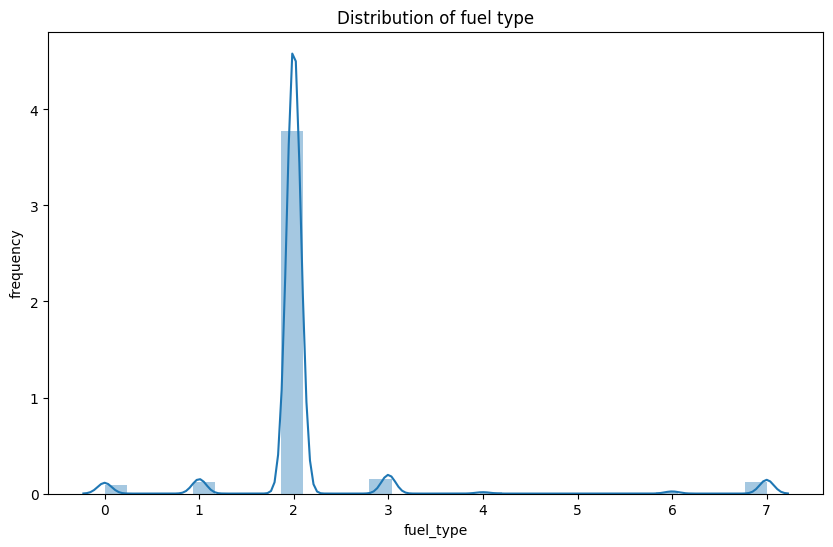

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.distplot(concat_df['fuel_type'], bins=30, kde=True)
plt.title('Distribution of fuel type')
plt.xlabel('fuel_type')
plt.ylabel('frequency')
plt.show()


the majority of vehicles are diesel fuel type

vehicle prices depending on fuel type

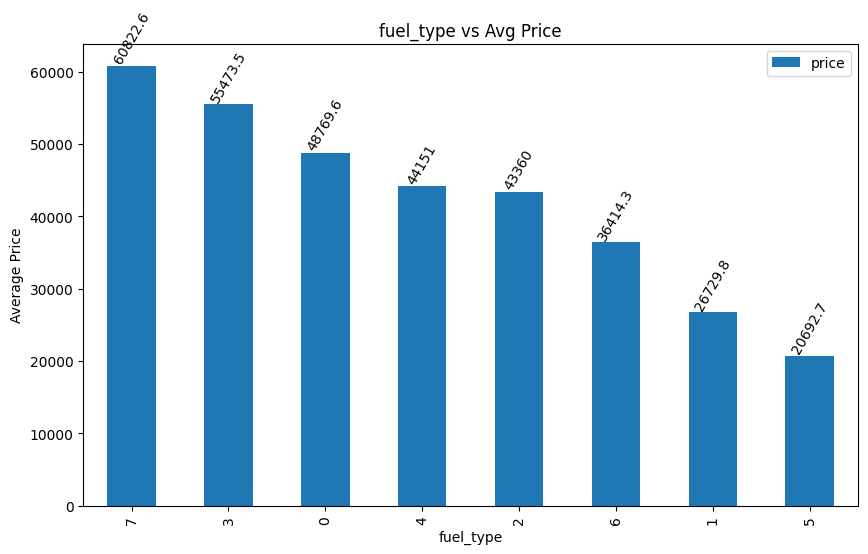

In [20]:
fuel_value = concat_df[["fuel_type","price"]].groupby("fuel_type").mean().sort_values("price",ascending = False)
ax = fuel_value.plot(kind="bar", figsize=(10, 6))
for container in ax.containers:
    ax.bar_label(container, rotation = 60)
plt.ylabel("Average Price")
plt.xlabel("fuel_type")
plt.title("fuel_type vs Avg Price")
plt.show()

cars price depends brand

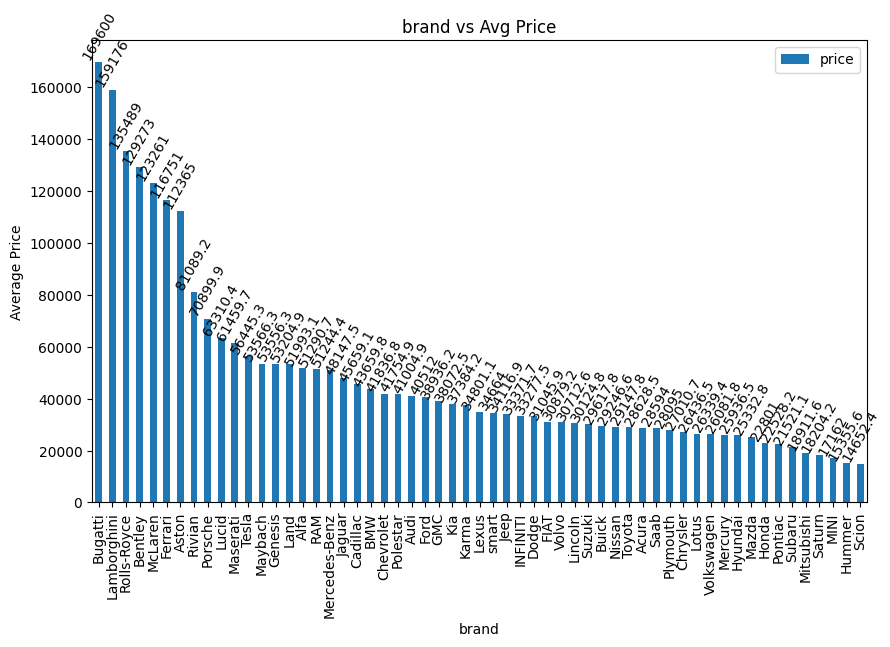

In [21]:
brand_value = concat_df[["brand","price"]].groupby("brand").mean().sort_values("price",ascending = False)
ax = brand_value.plot(kind="bar", figsize=(10, 6))
for container in ax.containers:
    ax.bar_label(container, rotation = 60)
plt.ylabel("Average Price")
plt.xlabel("brand")
plt.title("brand vs Avg Price")
plt.show()

We will see the price /milage ratio

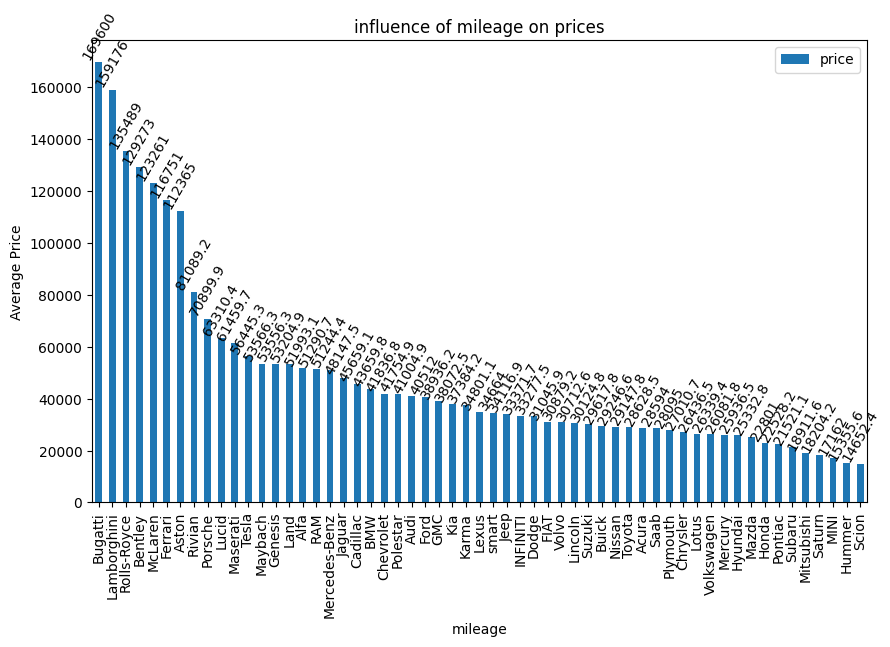

In [22]:
mileage = concat_df[["milage","price"]].groupby("milage").mean().sort_values("price",ascending = False)
ax = brand_value.plot(kind="bar", figsize=(10, 6))
for container in ax.containers:
    ax.bar_label(container, rotation = 60)
plt.ylabel("Average Price")
plt.xlabel("mileage")
plt.title("influence of mileage on prices")
plt.show()

Model Training
Select columns for X: I want to choose four columns(fuel_type, milage, engine_capacity, engine_strength) by explicitly mentioning them.
Select column for y: I want to also specify the target column for y.

In [35]:
# Remove NaN values from milage
concat_df = concat_df.dropna(subset=['milage'])

In [36]:
# Remove NaN values from engine_capacity and engine_strength
concat_df = concat_df.dropna(subset=['engine_capacity'])
concat_df = concat_df.dropna(subset=['engine_strength'])

In [39]:
# Remove NaN values from price
concat_df = concat_df.dropna(subset=['price'])

In [41]:
# Selecting columns for X
x = [ 'fuel_type', 'milage', 'engine_capacity', 'engine_strength']
X = concat_df[x]

# Selecting the target column for y
y = concat_df['price']

# Checking dimensions
print(X.shape, y.shape)


(150647, 4) (150647,)


We will use the Gradient Boosting model, Gradient Boosting works well for regression problems like predicting prices.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for GradientBoostingRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Refit the model with the best hyperparameters
gb_model_best = grid_search.best_estimator_

# Evaluate the model with the best hyperparameters
y_pred_best = gb_model_best.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mse_best ** 0.5

print("Mean Absolute Error (MAE) with best hyperparameters:", mae_best)
print("Root Mean Squared Error (RMSE) with best hyperparameters:", rmse_best)